In [1]:
!pip install geopandas

In [2]:
import os, json
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
import seaborn as sn
import plotly.graph_objects as go

##########################################################################
##########################################################################

path_to_json = 'departements-france'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

x = datetime.datetime(2020, 3, 1)
df = pd.DataFrame()
for i in sorted(json_files):
    df_temp = gpd.read_file('departements-france/'+i)
    df_temp["date"] = x
    x+= timedelta(days=1)
    frames = [df_temp, df]
    df = pd.concat(frames)

##########################################################################
##########################################################################
df1 = pd.DataFrame(df)
df1["lon"] = df.geometry.x
df1["lat"] = df.geometry.y

DeserializableColumns = ['Population', 'Beds']

for DeserializableColumn in DeserializableColumns:

  #Normalize Json Format
  jsonDf = pd.json_normalize(df1[DeserializableColumn])

  #Adding normalised json data into Df
  df1 = df1.join(jsonDf, rsuffix='' + DeserializableColumn)

#Drop Json Data
df1 = df1.drop(DeserializableColumns, axis=1)

df1= df1.drop(['geometry', 'Emergencies', 'MedicalTests','MedicalActs'], axis=1)
df1["Confirmed"].fillna(0.0, inplace = True)
df1["Deaths"].fillna(0.0, inplace = True)
df1["Recovered"].fillna(0.0, inplace = True)
df1["Severe"].fillna(0.0, inplace = True)
df1["Critical"].fillna(0.0, inplace = True)
##########################################################################
##########################################################################


X2 = pd.DataFrame()
X2["lon"]=df1["lon"]
X2["lat"]=df1["lat"]
X2["Deaths"]=df1["Deaths"]
X2["Recovered"]=df1["Recovered"]
X2["Severe"]=df1["Severe"]
X2["Critical"]=df1["Critical"]
X2["Confirmed"]=df1["Confirmed"]
X2["Total"]=df1["Total"]
X2["Under19"]=df1["Under19"]
X2["Under39"]=df1["Under39"]
X2["Under59"]=df1["Under59"]
X2["Under74"]=df1["Under74"]
X2["Over75"]=df1["Over75"]
X2["Resuscitation"]=df1["Resuscitation"]
X2["IntensiveCare"]=df1["IntensiveCare"]
X2["TotalBeds"]=df1["TotalBeds"]
X2["date"]=df1["date"]
X2["Province/State"]=df1["Province/State"]
X2["date"]= X2["date"].apply(lambda x: x.strftime('%Y-%m-%d'))
X2 = X2.sort_values(by='date')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



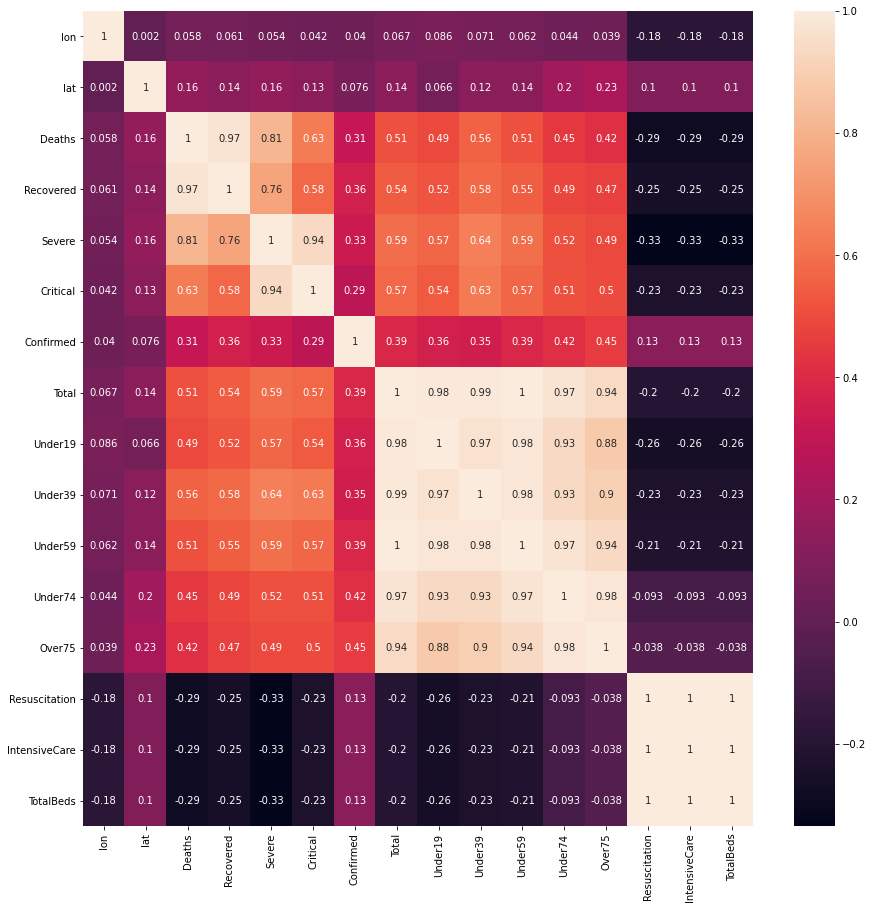

In [3]:
corrMatrix = X2.corr()
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(corrMatrix, annot=True)
plt.show()

KNN mort en fontion de la population TOTAL


In [0]:
X3 = pd.DataFrame()
X3["lon"]=X2["lon"]
X3["lat"]=X2["lat"]
X3["Deaths"]=X2["Deaths"]
X3["Total"]=X2["Total"]
X3["date"]=X2["date"]
X3["Province/State"]=X2["Province/State"]

In [5]:
X3.columns[2:4]

Index(['Deaths', 'Total'], dtype='object')

In [0]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X3[X3.columns[2:3]]) # Compute k-means clustering.
X3['cluster_label'] = kmeans.fit_predict(X3[X3.columns[2:4]])


In [7]:
fig = px.scatter_mapbox(X3, lat="lat", lon="lon",
                        color="cluster_label", zoom=3, size="Deaths",animation_frame="date", hover_name="Province/State")
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

KNN sur les morts

In [0]:
X4 = pd.DataFrame()
X4["lon"]=X2["lon"]
X4["lat"]=X2["lat"]
X4["Deaths"]=X2["Deaths"]
X4["date"]=X2["date"]
X4["Province/State"]=X2["Province/State"]

In [9]:
X3.columns[2:3]

Index(['Deaths'], dtype='object')

In [0]:
kmeans2 = KMeans(n_clusters = 3, init ='k-means++')
kmeans2.fit(X4[X4.columns[2:3]]) # Compute k-means clustering.
X4['cluster_label'] = kmeans2.fit_predict(X4[X4.columns[2:3]])

In [11]:
fig = px.scatter_mapbox(X4, lat="lat", lon="lon",
                        color="cluster_label", zoom=3, size="Deaths",animation_frame="date", hover_name="Province/State")
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
X5 = pd.DataFrame()
X5["lon"]=X2["lon"]
X5["lat"]=X2["lat"]
X5["Deaths"]=X2["Deaths"]
X5["Recovered"]=X2["Recovered"]
X5["Severe"]=X2["Severe"]
X5["Critical"]=X2["Critical"]
X5["Confirmed"]=X2["Confirmed"]
X5["Total"]=X2["Total"]
X5["Under19"]=X2["Under19"]
X5["Under39"]=X2["Under39"]
X5["Under59"]=X2["Under59"]
X5["Under74"]=X2["Under74"]
X5["Over75"]=X2["Over75"]
X5["date"]=X2["date"]
X5["Province/State"]=X2["Province/State"]

In [13]:
X5.columns[2:13]

Index(['Deaths', 'Recovered', 'Severe', 'Critical', 'Confirmed', 'Total',
       'Under19', 'Under39', 'Under59', 'Under74', 'Over75'],
      dtype='object')

In [0]:
kmeans3 = KMeans(n_clusters = 3, init ='k-means++')
kmeans3.fit(X5[X5.columns[2:13]]) # Compute k-means clustering.
X5['cluster_label'] = kmeans2.fit_predict(X5[X5.columns[2:13]])

In [15]:
fig = px.scatter_mapbox(X5, lat="lat", lon="lon",
                        color="cluster_label", zoom=3, size="Deaths",animation_frame="date", hover_name="Province/State")
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
X6 = pd.DataFrame()
X6["lon"]=X2["lon"]
X6["lat"]=X2["lat"]
X6["Confirmed"]=X2["Confirmed"]
X6["Under19"]=X2["Under19"]
X6["Under39"]=X2["Under39"]
X6["Under59"]=X2["Under59"]
X6["Under74"]=X2["Under74"]
X6["Over75"]=X2["Over75"]
X6["date"]=X2["date"]
X6["Province/State"]=X2["Province/State"]

In [19]:
X6.columns[2:7]

Index(['Confirmed', 'Under19', 'Under39', 'Under59', 'Under74'], dtype='object')

In [0]:
kmeans4 = KMeans(n_clusters = 4, init ='k-means++')
kmeans4.fit(X6[X6.columns[2:7]]) # Compute k-means clustering.
X6['cluster_label'] = kmeans2.fit_predict(X6[X6.columns[2:7]])

In [22]:
fig = px.scatter_mapbox(X6, lat="lat", lon="lon",
                        color="cluster_label", zoom=3, size="Confirmed",animation_frame="date", hover_name="Province/State")
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()